In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\k\Downloads\VT classes\Grad classes\CS 5805\CS 5805 Final Project\blog\regression':
  os.chdir(r'C:\Users\k\Downloads\VT classes\Grad classes\CS 5805\CS 5805 Final Project\blog\regression')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\k\AppData\Local\Temp\ipykernel_44200\3884860229.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap_external.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\codecs.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\aliases.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\__init__.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\utf_8.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\abc.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\io.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\stat.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\_collections_abc.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\genericpath.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\ntpath.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\os.py": 1686090633.0, "C:\\Users\\k

In [2]:
import numpy as np
import pandas as pd
dat = pd.read_csv("playDatSteelCity23.csv")
dat = dat.drop(['Unnamed: 0'], axis=1)
dat.head()

,Player,ActivePoss,ActivePossScored,ScorePerc,Touches,PickUp,CenterThrow,DumpThrow,SwingThrow,UpLineThrow,...,RecEPA,HanEPARes,HanEPA2,HanEPATurn,RecEPATurn,EPA,TourneyScore,TourneyGrade,EPAPerPoss,EPAPerTouch
0,AR,20,7,35.0,54,6,0,0,9,2,...,0.398,0.718,1.108,-0.420,0.000,1.248,1.00,A,0.062377,0.023103
1,AK,10,5,50.0,25,0,0,0,2,0,...,0.200,0.300,0.307,0.000,0.000,0.248,0.33,B,0.024833,0.009933
2,JL,41,15,36.6,115,2,0,3,21,6,...,1.843,0.956,-0.073,-2.074,-0.416,1.512,0.95,B,0.036869,0.013145
3,ZA,16,7,43.8,40,4,1,1,5,3,...,-0.101,0.415,0.589,-0.829,-0.209,0.230,0.59,B,0.014361,0.005744
4,CM,29,10,34.5,119,19,2,5,12,5,...,0.229,0.637,0.612,-1.915,0.000,0.583,0.16,C,0.020089,0.004896


Simple Linear Regression Results:
MAE: 1.7046452385680408
MSE: 4.266265390223901
r2: 0.3095534106317076


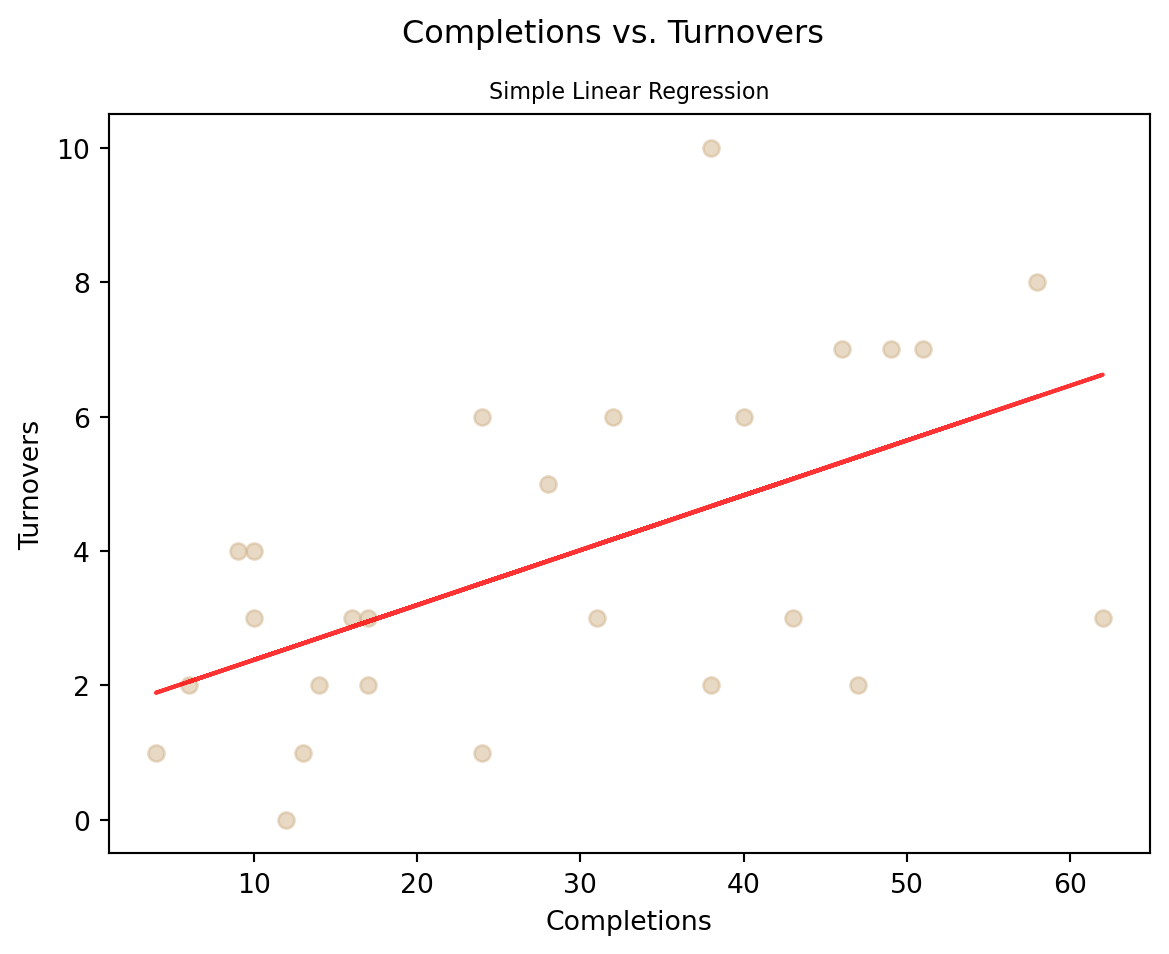

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error                # metric for evaluating regression model
from sklearn.metrics import mean_absolute_error               # metric for evaluating regression model
from sklearn.metrics import r2_score                          # metric for evaluating regression model
import matplotlib.pyplot as plt

X = dat['Completion']
X = X.array.reshape(-1, 1)
y = dat['HanTurn']
lin_reg = LinearRegression().fit(X, y)

y_pred = lin_reg.predict(X)
print("Simple Linear Regression Results:")
print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("r2:", r2_score(y, y_pred))

plt.scatter(X, y, alpha = 0.5, c = 'tan')
plt.plot(X, lin_reg.coef_*X + lin_reg.intercept_, 'r', alpha = 0.8)
plt.suptitle('Completions vs. Turnovers')
plt.title('Simple Linear Regression', fontsize='small')
plt.xlabel('Completions')
plt.ylabel('Turnovers')
plt.show()

Multiple Linear Regression Results:
MAE: 1.1226947869586312
MSE: 1.895917072931667
r2: 0.6931673590371541


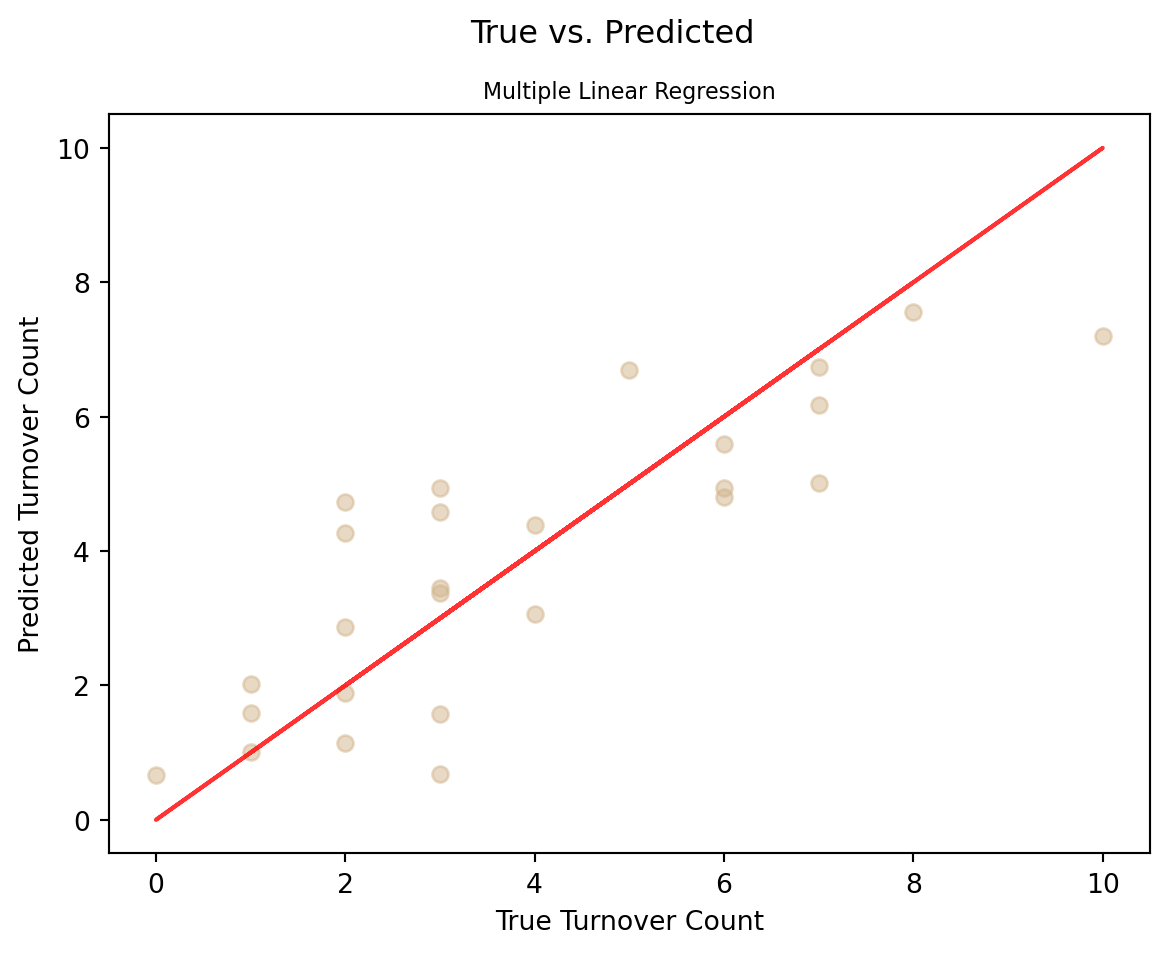

Slope for Completion Count:  0.11
Slope for Throwing Error Rate:  -0.17
Slope for Average Throw Distance:  0.36


In [4]:
X = dat[['Completion', 'HanErrorPerc', 'AvgThrow']]
lin_reg = LinearRegression().fit(X, y)

y_pred = lin_reg.predict(X)
print("Multiple Linear Regression Results:")
print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("r2:", r2_score(y, y_pred))

plt.scatter(y, y_pred, alpha = 0.5, c = 'tan')
plt.plot(y, y, 'r', alpha = 0.8)
plt.suptitle('True vs. Predicted')
plt.title('Multiple Linear Regression', fontsize='small')
plt.xlabel('True Turnover Count')
plt.ylabel('Predicted Turnover Count')
plt.show()

print("Slope for Completion Count: ", round(lin_reg.coef_[0], 2))
print("Slope for Throwing Error Rate: ", round(lin_reg.coef_[1], 2))
print("Slope for Average Throw Distance: ", round(lin_reg.coef_[2], 2))

Polynomial Regression Results:
MAE: 0.6980721701952676
MSE: 0.7643831224252391
r2: 0.8762932748959872


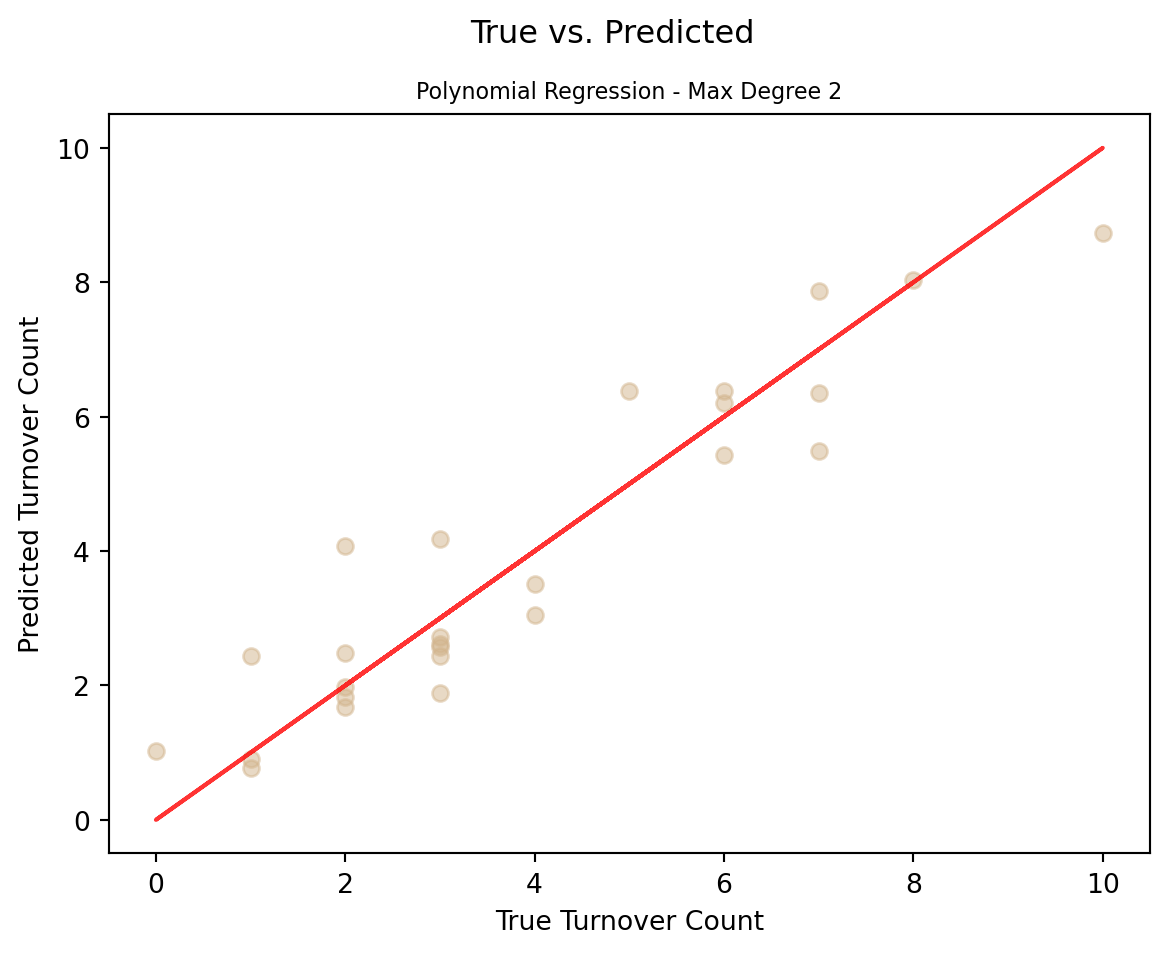

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression().fit(X_poly, y)
y_pred = poly_reg.predict(X_poly)
print("Polynomial Regression Results:")
print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("r2:", r2_score(y, y_pred))

plt.scatter(y, y_pred, alpha = 0.5, c = 'tan')
plt.plot(y, y, 'r', alpha = 0.8)
plt.suptitle('True vs. Predicted')
plt.title('Polynomial Regression - Max Degree 2', fontsize='small')
plt.xlabel('True Turnover Count')
plt.ylabel('Predicted Turnover Count')
plt.show()

Polynomial Regression Results:
MAE: 5.916293096456334e-13
MSE: 6.749807022168741e-25
r2: 1.0


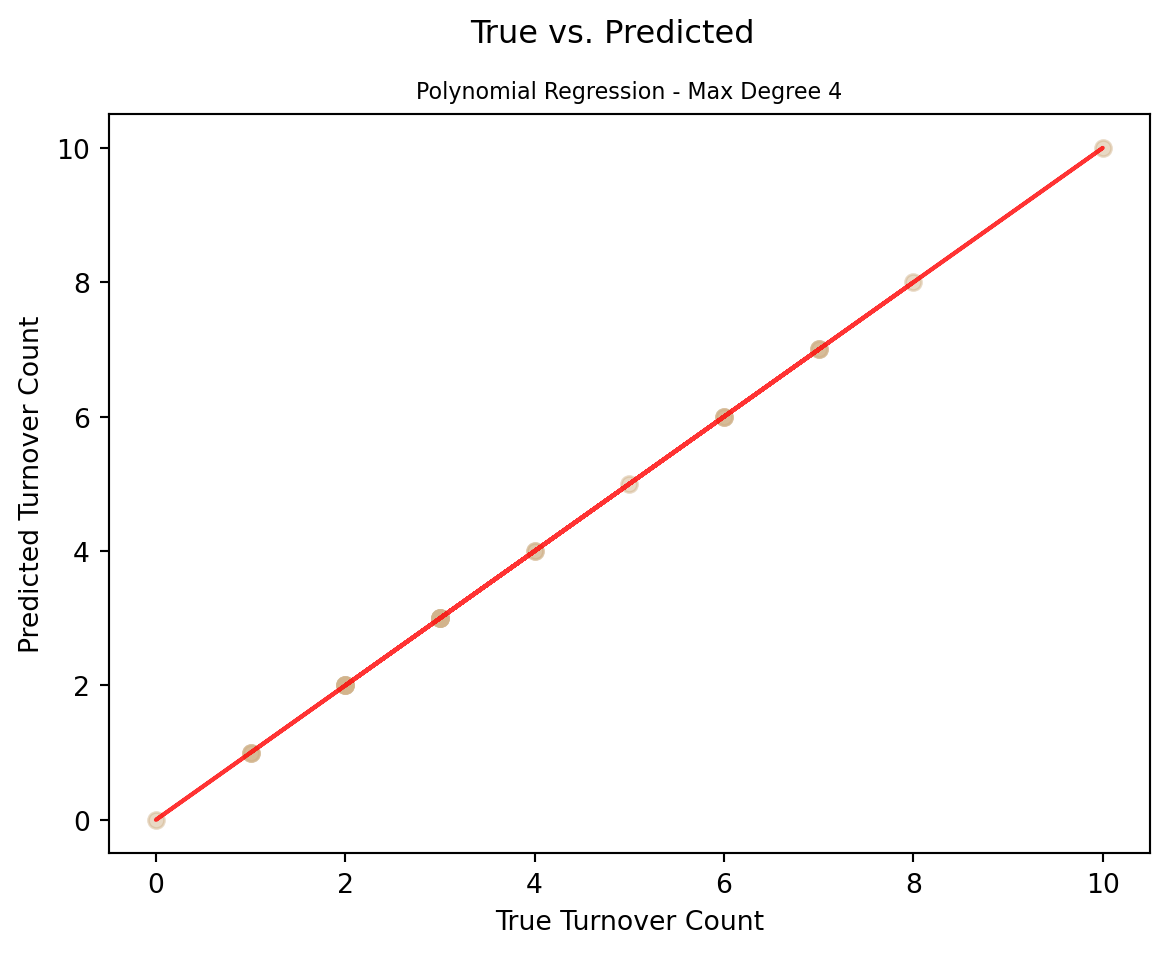

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression().fit(X_poly, y)
y_pred = poly_reg.predict(X_poly)
print("Polynomial Regression Results:")
print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("r2:", r2_score(y, y_pred))

plt.scatter(y, y_pred, alpha = 0.5, c = 'tan')
plt.plot(y, y, 'r', alpha = 0.8)
plt.suptitle('True vs. Predicted')
plt.title('Polynomial Regression - Max Degree 4', fontsize='small')
plt.xlabel('True Turnover Count')
plt.ylabel('Predicted Turnover Count')
plt.show()